# Home assignment 1: Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [1]:
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('bmh')

In [2]:
def kalman_filter(x, E, verbose=False, verbose_last=False):
    """Apply Kalman filter to sequence

    Args:
        x: initial state space configuration (location and velocity)
        E: initial covariance matrix
    """
    k_log = []
    x_log = [x]

    for measurement in measurements:
        # prediction
        x = (F @ x) + u
        E = F @ E @ F.T

        # measurement update
        Z = np.array([measurement])
        S = H @ E @ H.T + R
        K = E @ H.T @ np.linalg.inv(S)
        x = x + (K @ (Z.T - (H @ x)))
        E = (I - (K @ H)) @ E
        
        k_log.append(K)
        x_log.append(x)

        if verbose:
            print(f"x= \n{x}")
            print(f"E= \n{E}")
    
    if verbose_last:
        print(f"x= \n{x}")
        emax, emin = E.max(), E.min()
        E = (E - emin) / (emax - emin)
        print(f"E= \n{E}")  

    return k_log, x_log

You could edit `kalman_filter` function if you need more info about the process e.g. `x` values over time and so on

_Hint:_ to define matrices below function [np.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) is very handy

In [3]:
dt = 0.1

# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = np.diag([0, 0, 1000, 1000])

# next state function: 4D
F = np.array([
    [1, 0, dt, 0],
    [0, 1, 0, dt],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# measurement function: reflect the fact that we observe x and y but not the two velocities
H = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
])

# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = np.diag([0.1, 0.1])

# 4D identity matrix
I = np.diag([1, 1, 1, 1])

## First experiment

In [4]:
measurements = [[5.0, 10.0], [6.0, 8.0], [7.0, 6.0], [8.0, 4.0], [9.0, 2.0], [10.0, 0.0]]
initial_xy = [4.0, 12.0]


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [5]:
k_log, x_log = kalman_filter(x, E, verbose=True, verbose_last=True)

x= 
[[  4.99009901]
 [ 10.02079208]
 [  9.9009901 ]
 [-20.79207921]]
E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
x= 
[[  5.99600798]
 [  8.00838323]
 [  9.98003992]
 [-20.95808383]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
x= 
[[  6.99785867]
 [  6.00449679]
 [  9.99286224]
 [-20.98501071]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
x= 
[[  7.99866711]
 [  4.00279907]
 [  9.99666778]
 [-20.99300233]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

_(It's a good idea to write a function for this, so you could reuse it in the next experiment)_

In [6]:
## YOUR CODE HERE
def plot_coords_and_velocity(x_log):
    axis_names = ['x', 'y', 'v_x', 'v_y']
    
    f, axes = plt.subplots(2, 2, figsize=(15,15))
    for ind, ax in enumerate(axes.flatten()):
        ax.plot([val[ind][0] for val in x_log])
        ax.set_ylabel(axis_names[ind])
        ax.set_xlabel('measurement')

    plt.show()
    
def plot_matrix_components(k_log):
    axis_names = ['k11', 'k12', 'k21', 'k22', 'k31', 'k32', 'k41', 'k42']
    
    f, axes = plt.subplots(4, 2, figsize=(15,15))
    for ind, ax in enumerate(axes.flatten()):
        ax.plot([val.flatten()[ind] for val in k_log])
        ax.set_ylabel(axis_names[ind])
        ax.set_xlabel('measurement')

    plt.show()

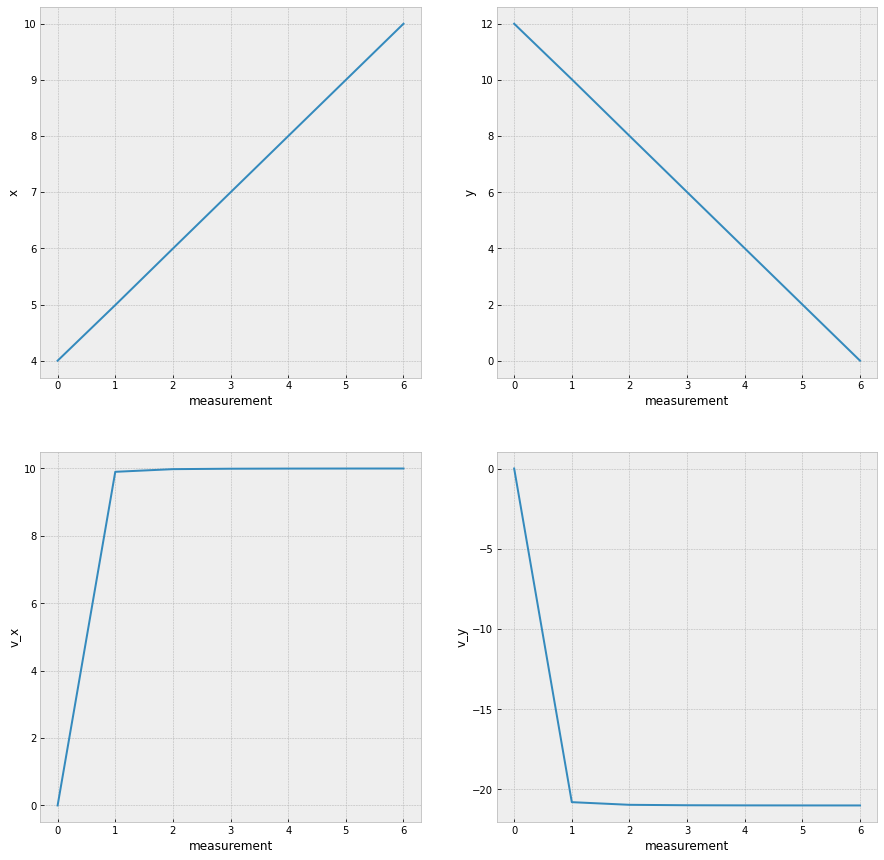

In [7]:
plot_coords_and_velocity(x_log)

Visualize the components of the $ K $ matrix below

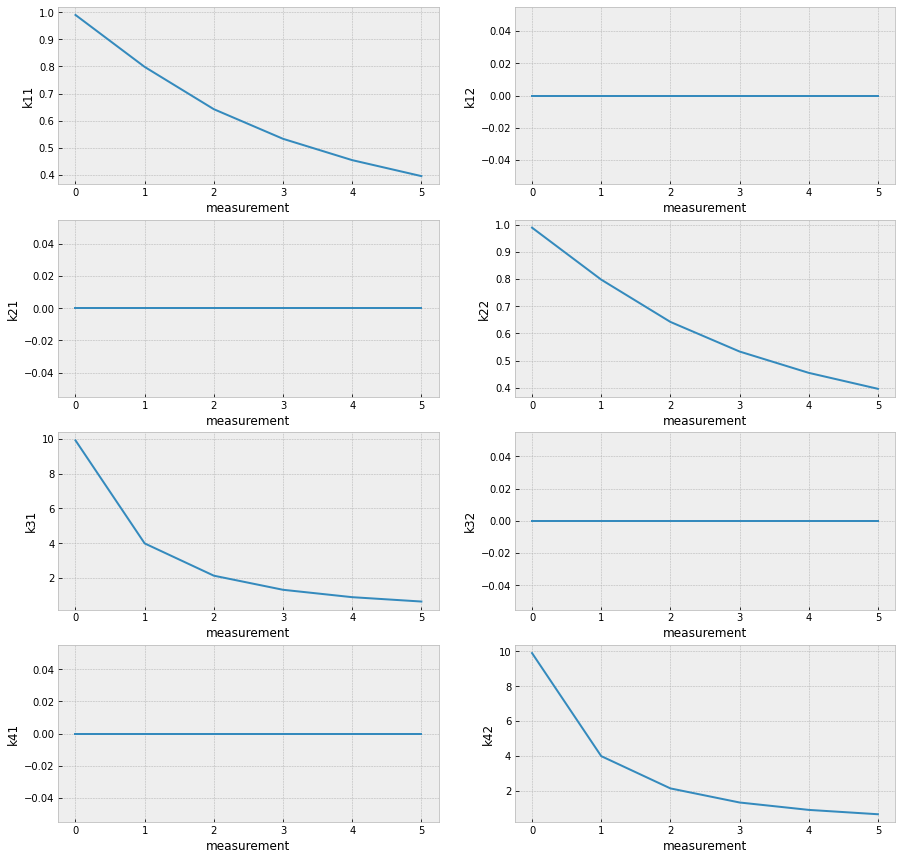

In [8]:
# YOUR CODE HERE
plot_matrix_components(k_log)

## Second experiment

In [9]:
measurements = [[1.0, 4.0], [6.0, 0.0], [11.0, -4.0], [16.0, -8.0]]
initial_xy = [-4.0, 8.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [10]:
k_log, x_log = kalman_filter(x, E, verbose=False)

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

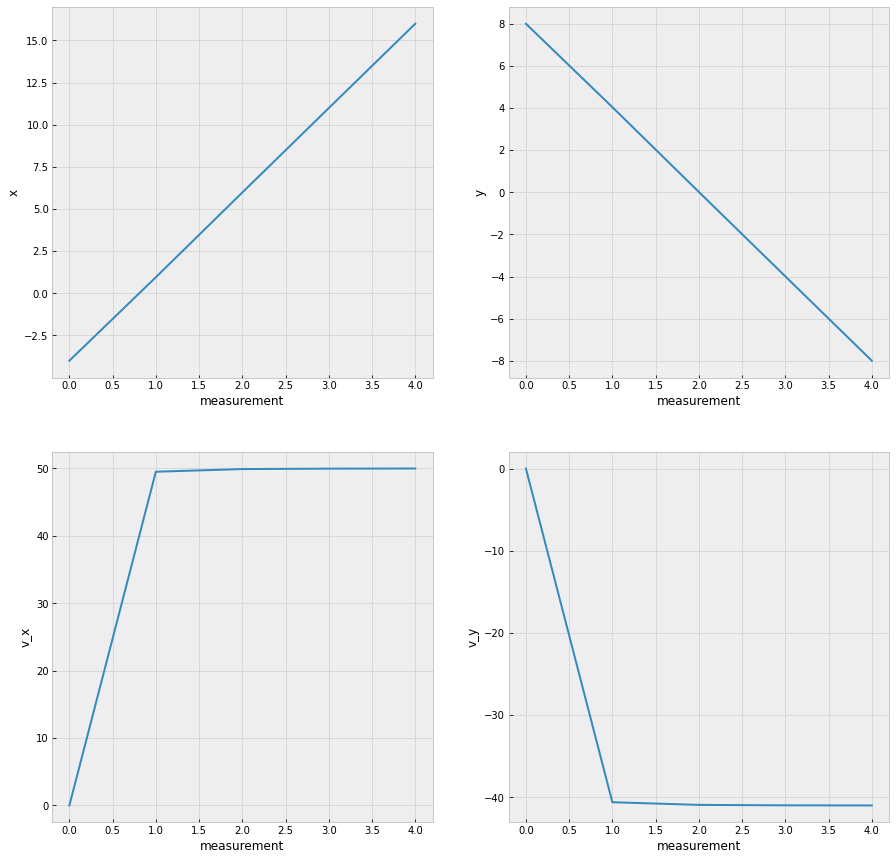

In [11]:
# YOUR CODE HERE
plot_coords_and_velocity(x_log)

Visualize the components of the $ K $ matrix below

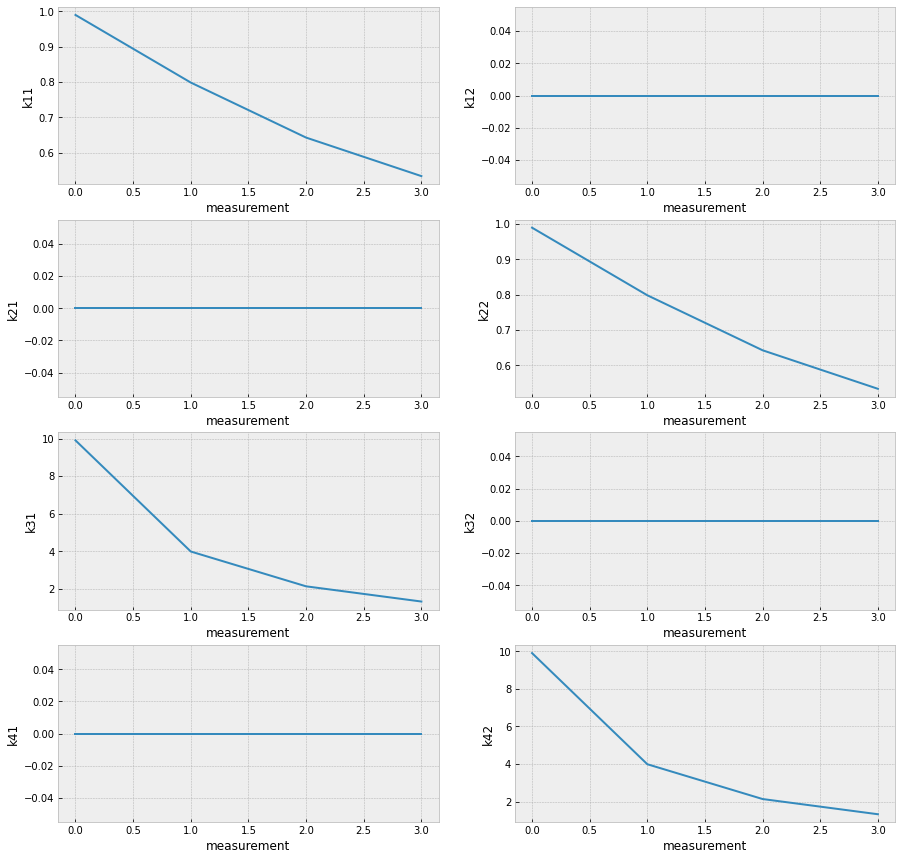

In [12]:
# YOUR CODE HERE
plot_matrix_components(k_log)

## Third Experiment

In [13]:
measurements = [[1.0, 17.0], [1.0, 15.0], [1.0, 13.0], [1.0, 11.0]]
initial_xy = [1.0, 19.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [14]:
k_log, x_log = kalman_filter(x, E, verbose=False)

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

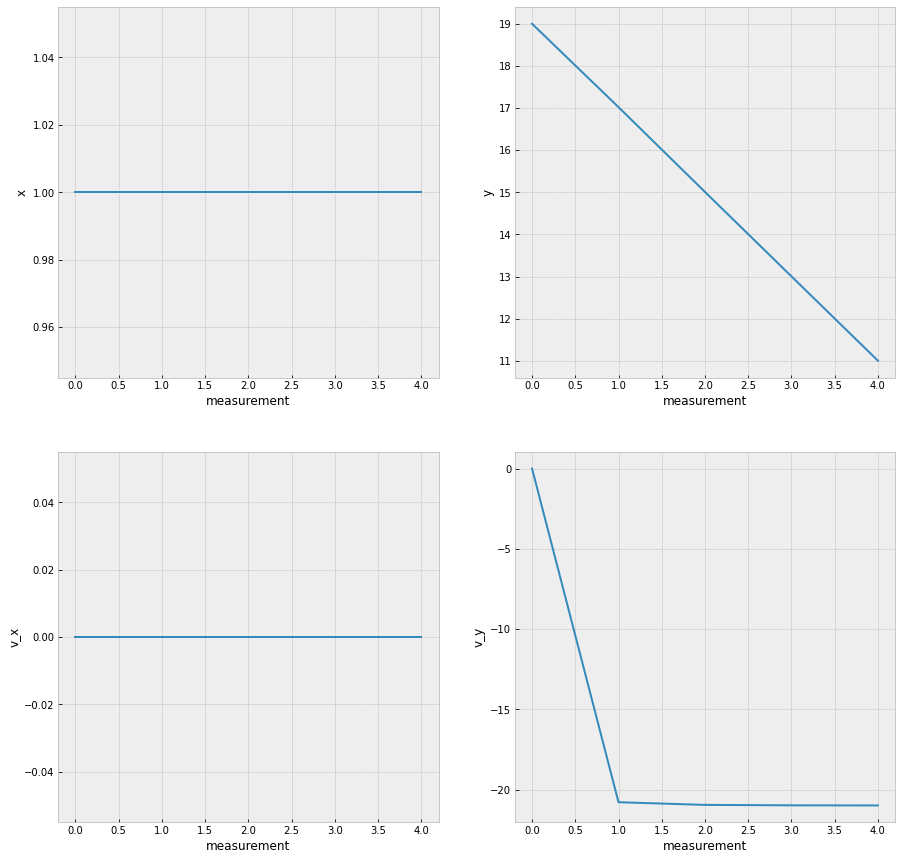

In [15]:
# YOUR CODE HERE
plot_coords_and_velocity(x_log)

Visualize the components of the $ K $ matrix below

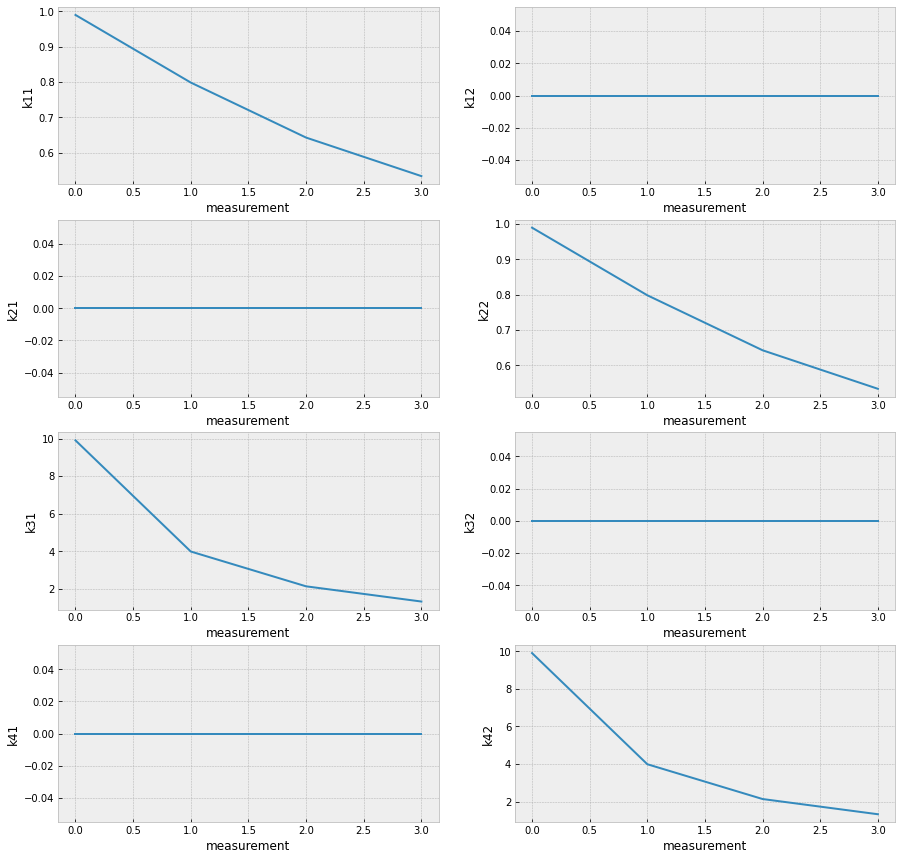

In [16]:
# YOUR CODE HERE
plot_matrix_components(k_log)

## Fourth Experiment (long non linear)

In [17]:
dt = 0.1
x_0 = 1.0
y_0 = 19.0

initial_xy = [x_0, y_0]
measurements = [[x_0 + 0.5 * i, y_0 - 2 * i ** 2] for i in range(1,50)]


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

Visualize the dependence of  𝑥 ,  𝑦 ,  𝑉𝑥 ,  𝑉𝑦  over time


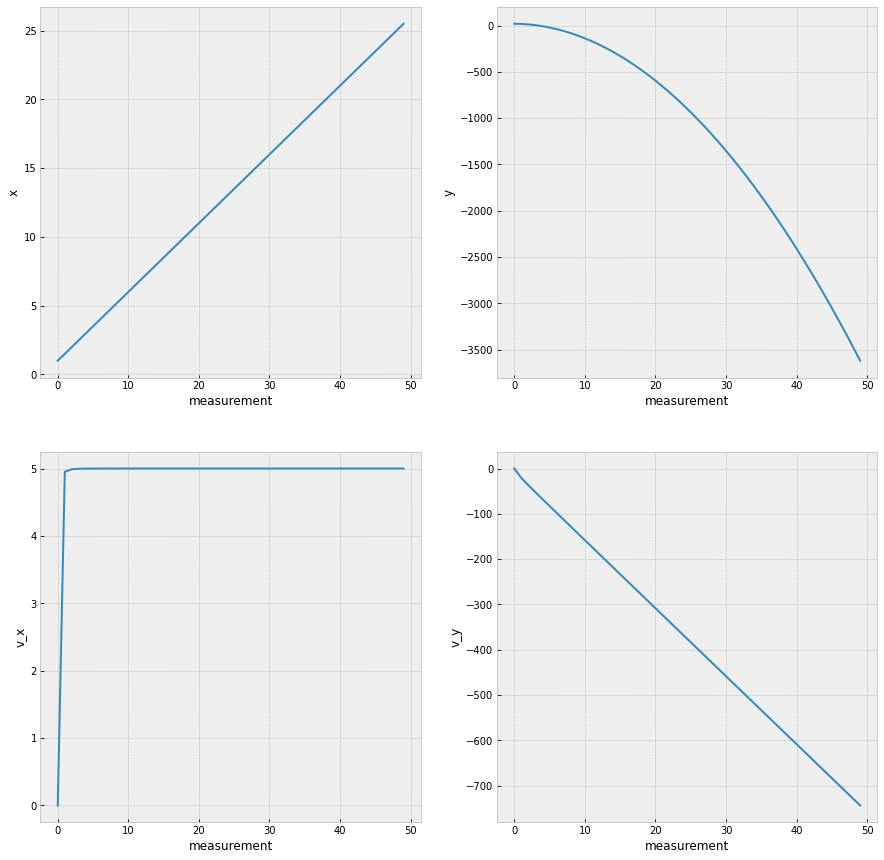

Visualize the components of the 𝐾 matrix below


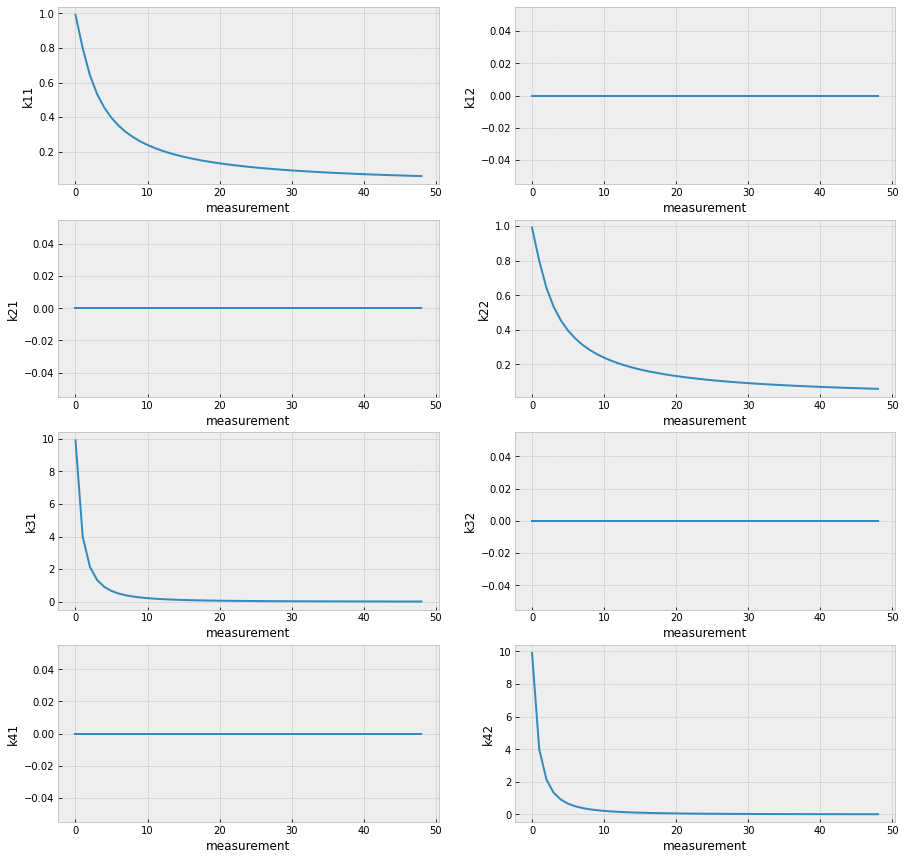

In [18]:
k_log, x_log = kalman_filter(x, E, verbose=False)

print('Visualize the dependence of  𝑥 ,  𝑦 ,  𝑉𝑥 ,  𝑉𝑦  over time')
plot_coords_and_velocity(x_log)
print('Visualize the components of the 𝐾 matrix below')
plot_matrix_components(k_log)

## Fifth Experiment (cos non linear)

In [19]:
dt = 0.1
x_0 = 1.0
y_0 = 19.0

initial_xy = [x_0, y_0]
measurements = [[x_0 + 1 * i, y_0 * np.cos(i * 3.14 / 180)] for i in range(5 * 360)]


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

x= 
[[ 1.79950042e+03]
 [-9.53681224e+00]
 [ 9.99166898e+00]
 [-1.15853785e+00]]
E= 
[[1.00000000e+00 0.00000000e+00 5.55555556e-03 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 5.55555556e-03]
 [5.55555556e-03 0.00000000e+00 3.08641975e-05 0.00000000e+00]
 [0.00000000e+00 5.55555556e-03 0.00000000e+00 3.08641975e-05]]
Visualize the dependence of  𝑥 ,  𝑦 ,  𝑉𝑥 ,  𝑉𝑦  over time


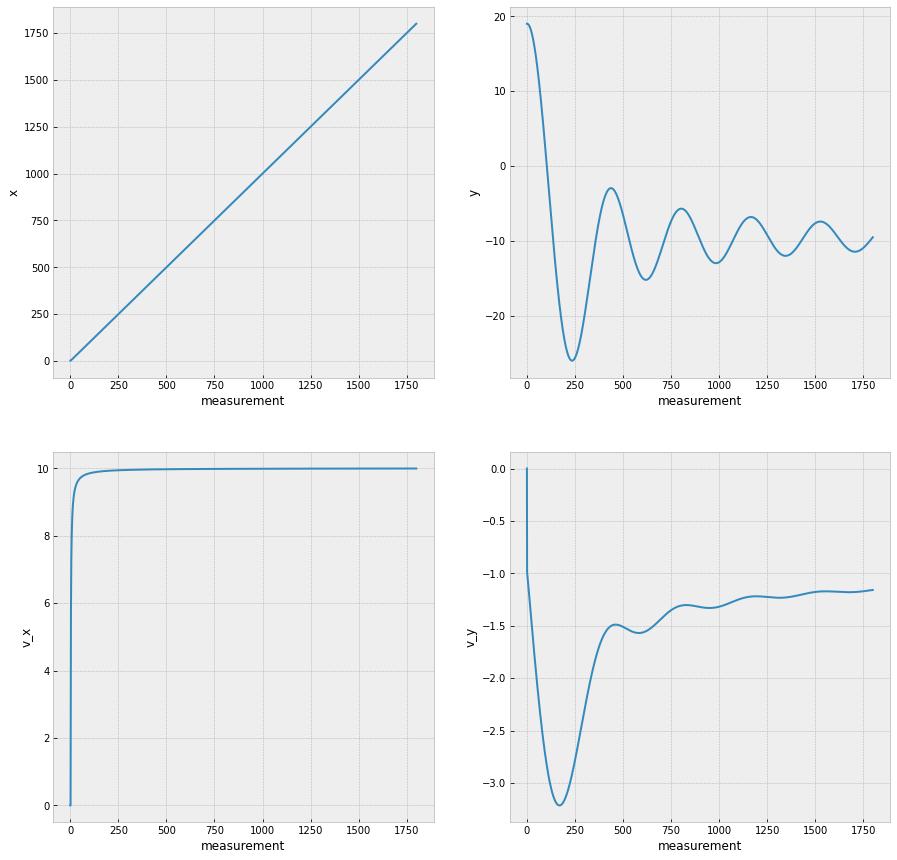

Visualize the components of the 𝐾 matrix below


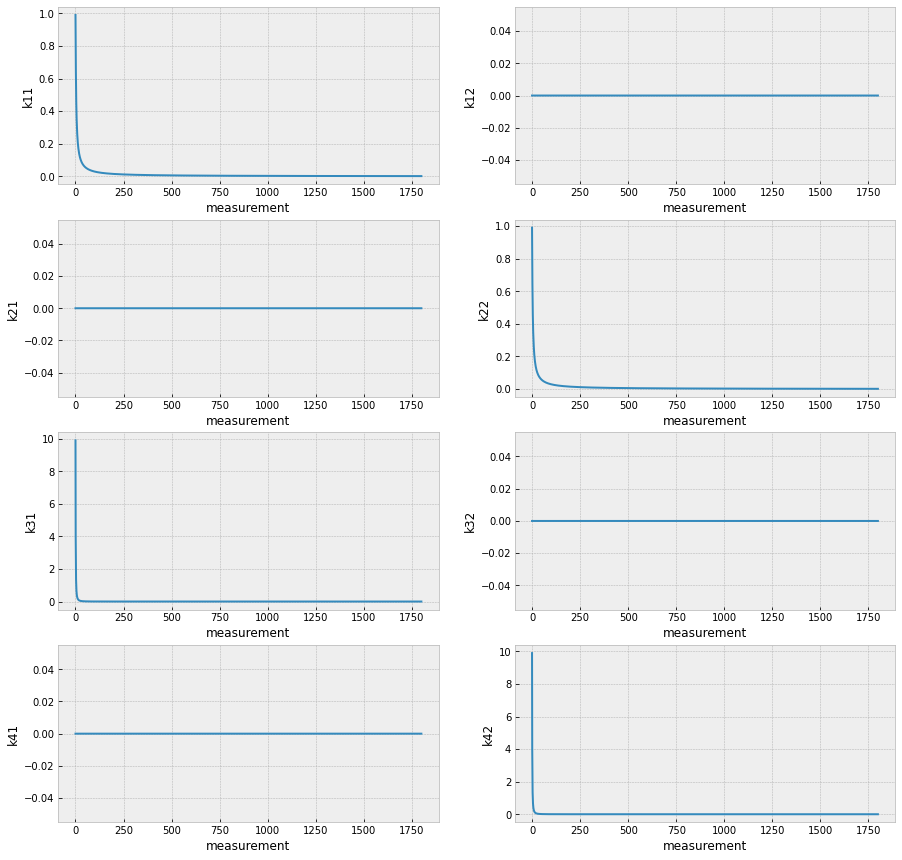

In [20]:
k_log, x_log = kalman_filter(x, E, verbose_last=True)

print('Visualize the dependence of  𝑥 ,  𝑦 ,  𝑉𝑥 ,  𝑉𝑦  over time')
plot_coords_and_velocity(x_log)
print('Visualize the components of the 𝐾 matrix below')
plot_matrix_components(k_log)

## Conclusions

Don't forget to put your thoughts on the experiments above.

Questions to stimulate thoughts could be found in the beginning of the notebook =)

What does the dynamics of changes in its components say?
- Матрица коэффициентов усиления $ K $ - служит для коррекции измерений на основании ковариационной матрицы $ E $.
Видно что с течением времени абсолютные значения в этой матрице ($ K $) снижаются и сходятся к асимптоте, 
это означает что ковариационная матрица ($ E $) "выучила" коэфициеты и обучилась под текущую среду.
При этом скорость сходимости зависит от начальных приближений матрицы $ E $.

How much does the velocity uncertainty decrease as a result of each experiment?
- С увеличением числа измерений точность определения скорости растет, при этом видно, что в показаниях скорости учитывается внешнее воздействие $ u $. Видно что в матрице ковариации за показания cкорости отвечают компоненты одного и того же направления (ковариация != 0)
